In [1]:
import os, sys, json
src_path = os.path.abspath(os.path.join(".."))
if src_path not in sys.path:
    sys.path.append(src_path)

import numpy as np
import matplotlib.pyplot as plt
from src.image_processor import default_image_transform
from src.config import CaptionConfig
from src.data_loader import CaptionDataManager
from src.image_processor import train_transform
from src.base_experiment import plot_eval
import math

import torch
import torch.optim as optim

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
config_path = os.path.join(src_path, "src","config.yml") 
print(config_path)
assert(os.path.exists(config_path))

manager = CaptionDataManager(config_path, n_sample=100)

print(manager)

/home/nsimsiri/Image-Captioning/src/config.yml
loading annotations into memory...


  0%|          | 0/100 [00:00<?, ?it/s]

Done (t=0.71s)
creating index...
index created!
loaded - val captions








100%|██████████| 100/100 [00:00<00:00, 1359.77it/s]

Loaded {} samples 100


# Cuda Check

In [3]:
cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")
print("cuda is available: {} - device: {}".format(cuda_available, device)) 

cuda is available: True - device: cuda


#  Experiments

In [4]:
from src.models.base_model import EncoderDecoder

vocab_size      = len(manager.vocab())
embed_size      = 32
hidden_size     = 64
num_layers      = 1
learning_rate   = 0.001



print("HYPER-PARAM[vocab={} embed={} hidden={} num_layers={} ]".format(vocab_size, 
                                                                       embed_size, 
                                                                       hidden_size,
                                                                       num_layers))
net = EncoderDecoder(vocab_size, 
                     embed_size=embed_size, 
                     hidden_size=hidden_size,
                     num_layers=num_layers)
net = net.to(device)

total_param_count = sum(param.numel() for param in net.parameters())
decoder_param_count = sum(param.numel() for param in net.decoder.parameters())
print("total param #: " + str(total_param_count))
print("decoder param #: " + str(decoder_param_count))

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)


HYPER-PARAM[vocab=426 embed=32 hidden=64 num_layers=1 ]
total param #: 132042
decoder param #: 66410


## Training

ep=0 step=2 loss=6.051437854766846
ep=0 step=4 loss=6.046643018722534
ep=0 step=6 loss=6.0425552527109785
ep=0 step=8 loss=6.038788616657257


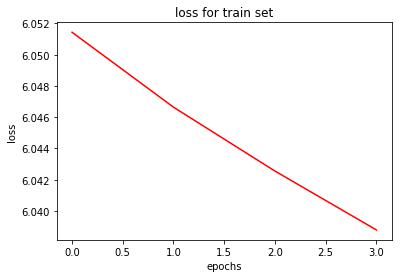

	 time elasped for epoch: 4.7404375076293945
ep=1 step=2 loss=6.013967275619507
ep=1 step=4 loss=6.008715033531189
ep=1 step=6 loss=6.002240419387817
ep=1 step=8 loss=5.995336174964905


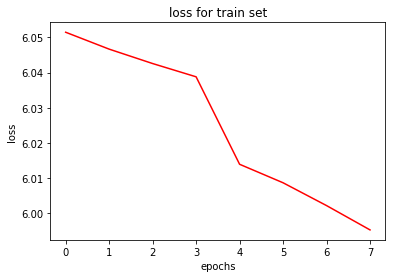

	 time elasped for epoch: 1.8773887157440186
ep=2 step=2 loss=5.950069904327393
ep=2 step=4 loss=5.943481802940369
ep=2 step=6 loss=5.931791226069133
ep=2 step=8 loss=5.913526892662048


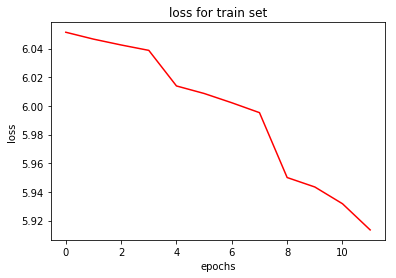

	 time elasped for epoch: 1.9493651390075684
ep=3 step=2 loss=5.798213481903076
ep=3 step=4 loss=5.738626480102539
ep=3 step=6 loss=5.691014369328816
ep=3 step=8 loss=5.64045637845993


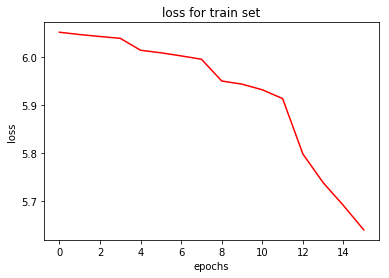

	 time elasped for epoch: 2.1562368869781494
ep=4 step=2 loss=5.328012466430664
ep=4 step=4 loss=5.271414875984192
ep=4 step=6 loss=5.252641439437866
ep=4 step=8 loss=5.227134108543396


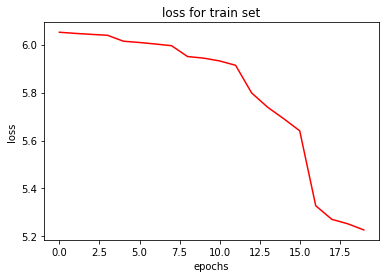

	 time elasped for epoch: 2.049741506576538
ep=5 step=2 loss=5.047159671783447
ep=5 step=4 loss=5.026213765144348
ep=5 step=6 loss=5.0181435743967695
ep=5 step=8 loss=5.0069485902786255


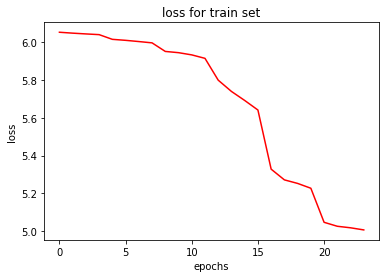

	 time elasped for epoch: 2.1468610763549805
ep=6 step=2 loss=4.919380187988281
ep=6 step=4 loss=4.94433069229126
ep=6 step=6 loss=4.926611502965291
ep=6 step=8 loss=4.943240284919739


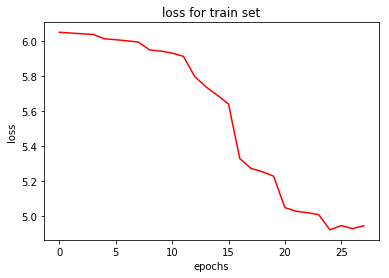

	 time elasped for epoch: 1.8542277812957764
ep=7 step=2 loss=4.88078761100769
ep=7 step=4 loss=4.971880793571472
ep=7 step=6 loss=4.932734409968059
ep=7 step=8 loss=4.900188446044922


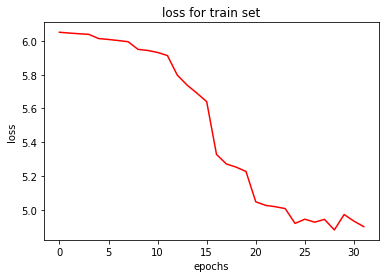

	 time elasped for epoch: 1.982635736465454
ep=8 step=2 loss=4.892666578292847
ep=8 step=4 loss=4.8464823961257935
ep=8 step=6 loss=4.869701067606608
ep=8 step=8 loss=4.863374710083008


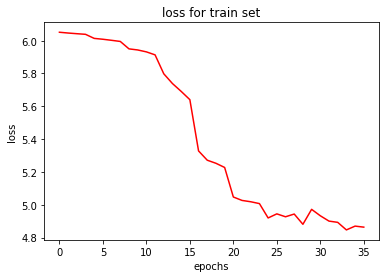

	 time elasped for epoch: 2.2998392581939697
ep=9 step=2 loss=4.832279205322266
ep=9 step=4 loss=4.807214260101318
ep=9 step=6 loss=4.819580872853597
ep=9 step=8 loss=4.827735602855682


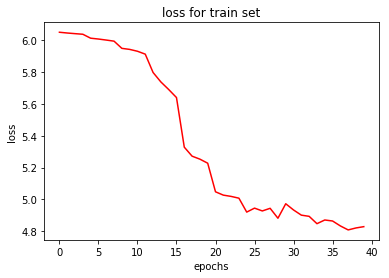

	 time elasped for epoch: 1.8631391525268555
ep=10 step=2 loss=4.710910320281982
ep=10 step=4 loss=4.760288953781128
ep=10 step=6 loss=4.772753715515137
ep=10 step=8 loss=4.784177005290985


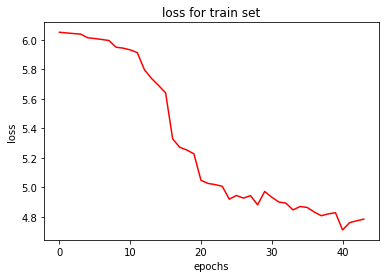

	 time elasped for epoch: 2.0591156482696533
ep=11 step=2 loss=4.664858102798462
ep=11 step=4 loss=4.716422438621521
ep=11 step=6 loss=4.754773298899333
ep=11 step=8 loss=4.73499721288681


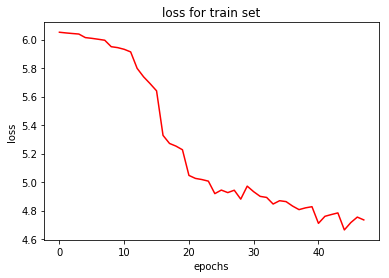

	 time elasped for epoch: 1.940161943435669
ep=12 step=2 loss=4.719813823699951
ep=12 step=4 loss=4.723856210708618
ep=12 step=6 loss=4.693675756454468
ep=12 step=8 loss=4.685450613498688


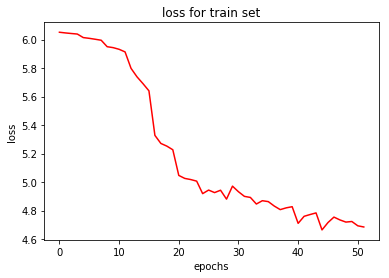

	 time elasped for epoch: 1.8675475120544434
ep=13 step=2 loss=4.6360368728637695
ep=13 step=4 loss=4.682857394218445
ep=13 step=6 loss=4.611038049062093
ep=13 step=8 loss=4.623415768146515


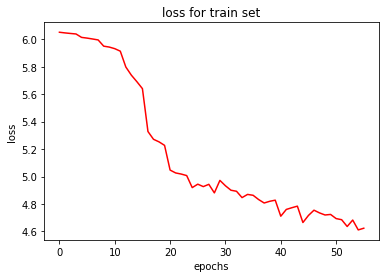

	 time elasped for epoch: 2.0747861862182617
ep=14 step=2 loss=4.598592519760132
ep=14 step=4 loss=4.6220492124557495
ep=14 step=6 loss=4.584261576334636
ep=14 step=8 loss=4.601807236671448


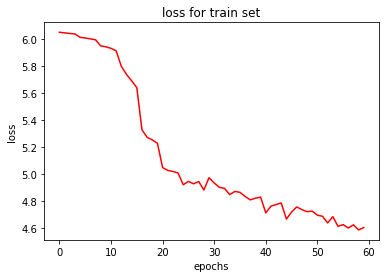

	 time elasped for epoch: 2.1044816970825195
ep=15 step=2 loss=4.649645805358887
ep=15 step=4 loss=4.579360723495483
ep=15 step=6 loss=4.525087436040242
ep=15 step=8 loss=4.528390169143677


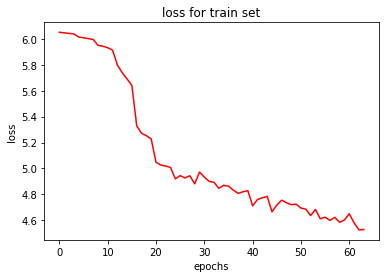

	 time elasped for epoch: 1.9057190418243408
ep=16 step=2 loss=4.487091779708862
ep=16 step=4 loss=4.509421229362488
ep=16 step=6 loss=4.469878355662028
ep=16 step=8 loss=4.469272613525391


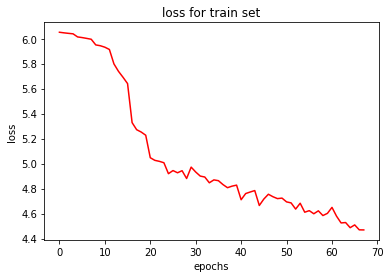

	 time elasped for epoch: 1.9921526908874512
ep=17 step=2 loss=4.443238258361816
ep=17 step=4 loss=4.396156430244446
ep=17 step=6 loss=4.428566932678223
ep=17 step=8 loss=4.415829658508301


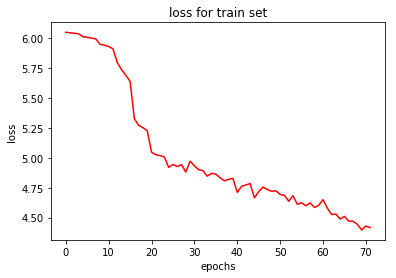

	 time elasped for epoch: 1.888028621673584
ep=18 step=2 loss=4.29332160949707
ep=18 step=4 loss=4.291157245635986
ep=18 step=6 loss=4.305015325546265
ep=18 step=8 loss=4.369550347328186


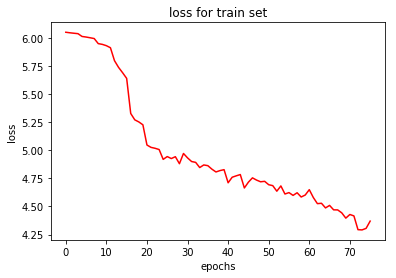

	 time elasped for epoch: 2.1381824016571045
ep=19 step=2 loss=4.28275728225708
ep=19 step=4 loss=4.307011961936951
ep=19 step=6 loss=4.277907053629558
ep=19 step=8 loss=4.306087374687195


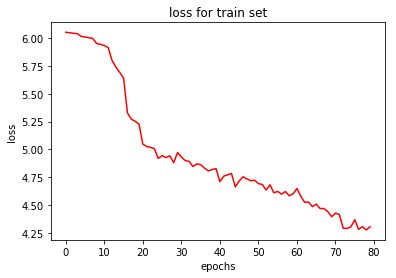

	 time elasped for epoch: 1.96164870262146
ep=20 step=2 loss=4.135484218597412
ep=20 step=4 loss=4.273062348365784
ep=20 step=6 loss=4.301264921824138
ep=20 step=8 loss=4.283326148986816


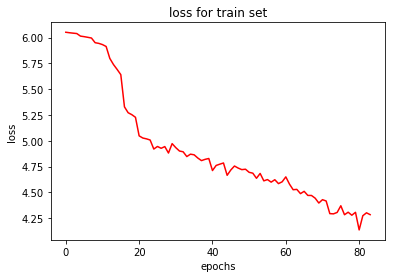

	 time elasped for epoch: 1.9104795455932617
ep=21 step=2 loss=4.177797555923462
ep=21 step=4 loss=4.213433146476746
ep=21 step=6 loss=4.2203342119852705
ep=21 step=8 loss=4.20482736825943


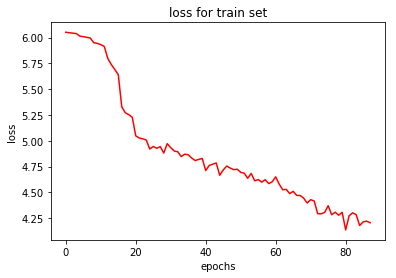

	 time elasped for epoch: 1.8334474563598633
ep=22 step=2 loss=4.1574342250823975
ep=22 step=4 loss=4.1334638595581055
ep=22 step=6 loss=4.133672873179118
ep=22 step=8 loss=4.163614749908447


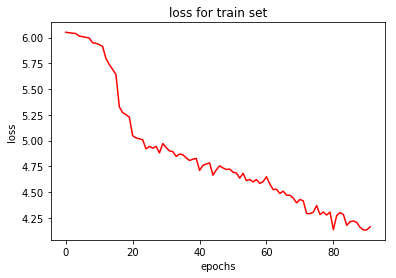

	 time elasped for epoch: 2.0562126636505127
ep=23 step=2 loss=4.116161823272705
ep=23 step=4 loss=4.15583062171936
ep=23 step=6 loss=4.155928532282512
ep=23 step=8 loss=4.115762710571289


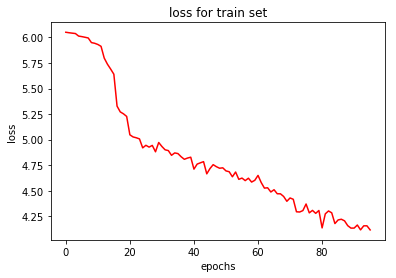

	 time elasped for epoch: 2.217275619506836
ep=24 step=2 loss=3.9789386987686157
ep=24 step=4 loss=4.029620587825775
ep=24 step=6 loss=4.031253457069397
ep=24 step=8 loss=4.081673234701157


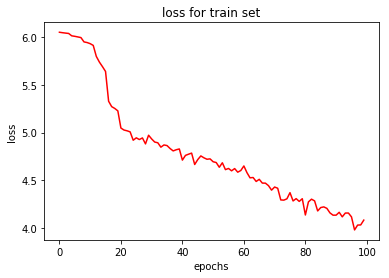

	 time elasped for epoch: 1.9550111293792725
ep=25 step=2 loss=4.042052149772644
ep=25 step=4 loss=4.001670241355896
ep=25 step=6 loss=4.058324893315633
ep=25 step=8 loss=4.049971729516983


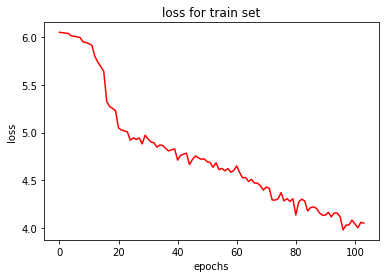

	 time elasped for epoch: 2.0361056327819824
ep=26 step=2 loss=4.045127987861633
ep=26 step=4 loss=3.9971213340759277
ep=26 step=6 loss=3.9897282123565674
ep=26 step=8 loss=4.006096184253693


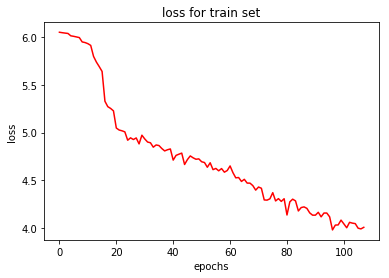

	 time elasped for epoch: 2.1349806785583496
ep=27 step=2 loss=4.046766638755798
ep=27 step=4 loss=4.066796600818634
ep=27 step=6 loss=3.95780082543691
ep=27 step=8 loss=3.9694192707538605


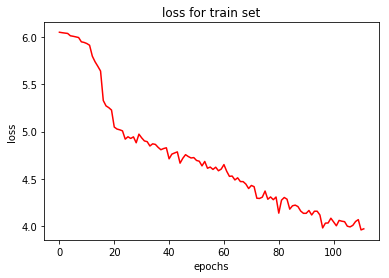

	 time elasped for epoch: 2.024684190750122
ep=28 step=2 loss=4.046279549598694
ep=28 step=4 loss=3.945145606994629
ep=28 step=6 loss=4.037831942240397
ep=28 step=8 loss=3.991139382123947


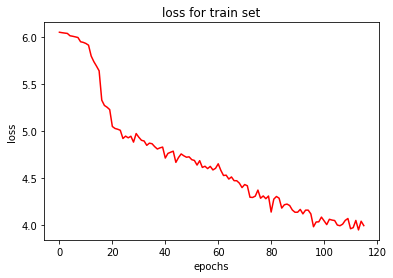

	 time elasped for epoch: 1.8873982429504395
ep=29 step=2 loss=3.8848387002944946
ep=29 step=4 loss=3.818830907344818
ep=29 step=6 loss=3.8915872971216836
ep=29 step=8 loss=3.9104819297790527


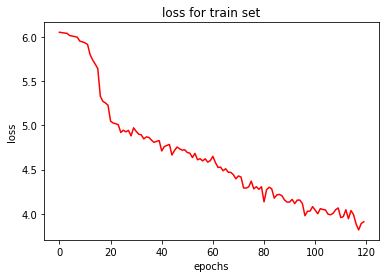

	 time elasped for epoch: 1.9913575649261475
ep=30 step=2 loss=3.8782235383987427
ep=30 step=4 loss=3.8430012464523315
ep=30 step=6 loss=3.8646346728006997
ep=30 step=8 loss=3.8878302574157715


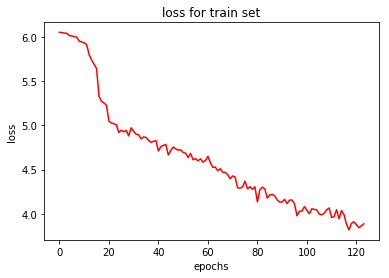

	 time elasped for epoch: 2.0180234909057617
ep=31 step=2 loss=3.8104026317596436
ep=31 step=4 loss=3.8447120785713196
ep=31 step=6 loss=3.857564687728882
ep=31 step=8 loss=3.839263677597046


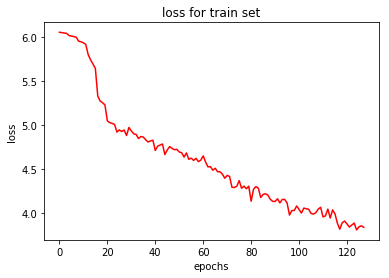

	 time elasped for epoch: 1.9669761657714844
ep=32 step=2 loss=3.8818105459213257
ep=32 step=4 loss=3.8147804737091064
ep=32 step=6 loss=3.84644615650177
ep=32 step=8 loss=3.848334103822708


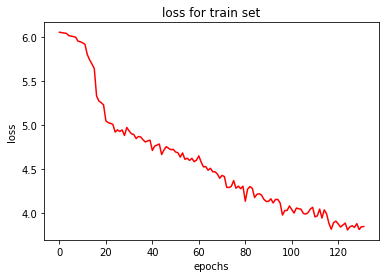

	 time elasped for epoch: 1.9308571815490723
ep=33 step=2 loss=3.7367806434631348
ep=33 step=4 loss=3.8425574898719788
ep=33 step=6 loss=3.8249184687932334
ep=33 step=8 loss=3.7961624562740326


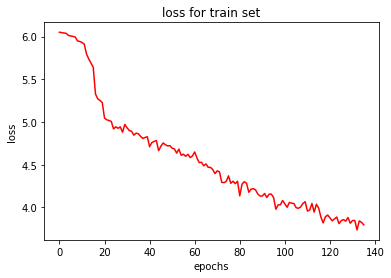

	 time elasped for epoch: 1.8772592544555664
ep=34 step=2 loss=3.694295287132263
ep=34 step=4 loss=3.680147349834442
ep=34 step=6 loss=3.7699554363886514
ep=34 step=8 loss=3.7402817010879517


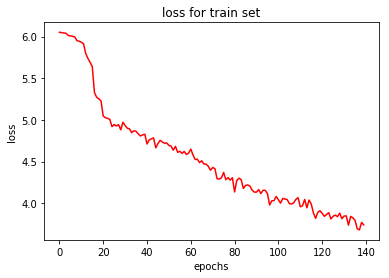

	 time elasped for epoch: 1.8718938827514648
ep=35 step=2 loss=3.625264048576355
ep=35 step=4 loss=3.7108088731765747
ep=35 step=6 loss=3.7064080238342285
ep=35 step=8 loss=3.7048977613449097


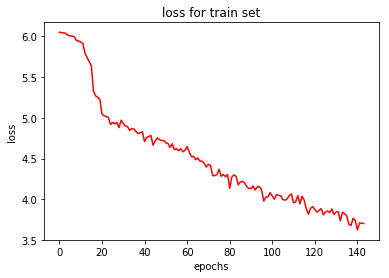

	 time elasped for epoch: 2.459496259689331
ep=36 step=2 loss=3.586790442466736
ep=36 step=4 loss=3.669526755809784
ep=36 step=6 loss=3.7107497453689575
ep=36 step=8 loss=3.700309634208679


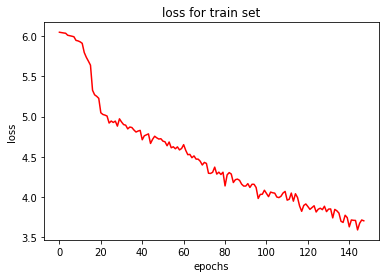

	 time elasped for epoch: 1.8600926399230957
ep=37 step=2 loss=3.482403039932251
ep=37 step=4 loss=3.6523969769477844
ep=37 step=6 loss=3.663085381189982
ep=37 step=8 loss=3.6571354269981384


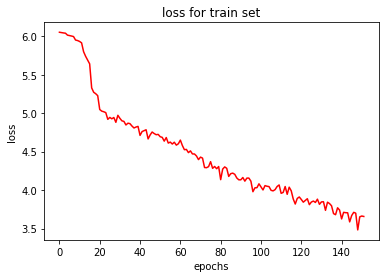

	 time elasped for epoch: 2.1535804271698
ep=38 step=2 loss=3.537353038787842
ep=38 step=4 loss=3.5566645860671997
ep=38 step=6 loss=3.614010810852051
ep=38 step=8 loss=3.6173030138015747


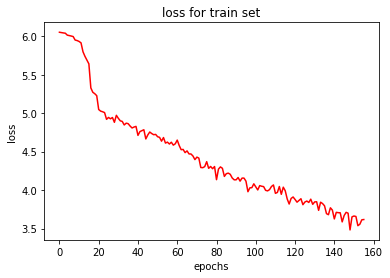

	 time elasped for epoch: 2.0918893814086914
ep=39 step=2 loss=3.534642815589905
ep=39 step=4 loss=3.628586530685425
ep=39 step=6 loss=3.6473628282546997
ep=39 step=8 loss=3.628148376941681


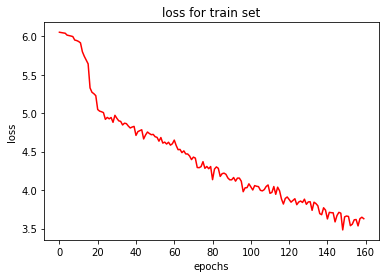

	 time elasped for epoch: 1.8722443580627441
ep=40 step=2 loss=3.5526918172836304
ep=40 step=4 loss=3.5368162393569946
ep=40 step=6 loss=3.5184408028920493
ep=40 step=8 loss=3.55441877245903


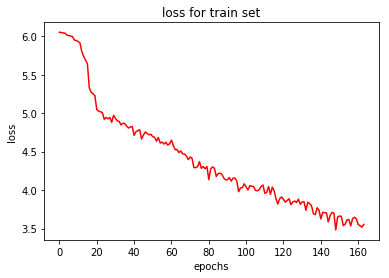

	 time elasped for epoch: 1.9727869033813477
ep=41 step=2 loss=3.511670708656311
ep=41 step=4 loss=3.463018298149109
ep=41 step=6 loss=3.5315913756688437
ep=41 step=8 loss=3.5481976866722107


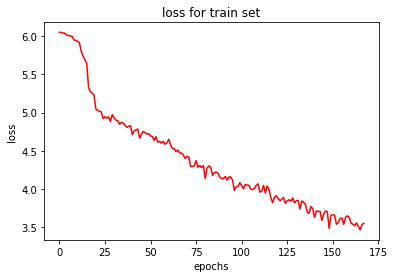

	 time elasped for epoch: 1.9828407764434814
ep=42 step=2 loss=3.4554823637008667
ep=42 step=4 loss=3.521871328353882
ep=42 step=6 loss=3.5408085584640503
ep=42 step=8 loss=3.527202695608139


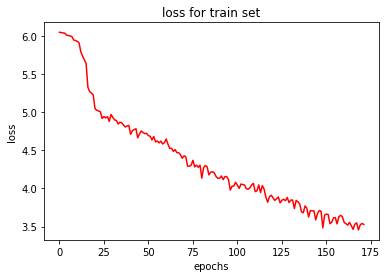

	 time elasped for epoch: 1.9908618927001953
ep=43 step=2 loss=3.3662744760513306
ep=43 step=4 loss=3.450679302215576
ep=43 step=6 loss=3.4644404649734497
ep=43 step=8 loss=3.476484626531601


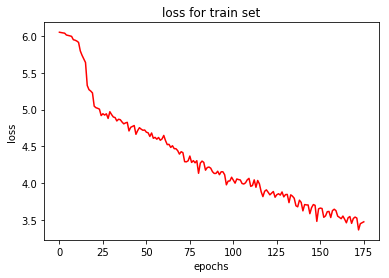

	 time elasped for epoch: 1.8553352355957031
ep=44 step=2 loss=3.501209855079651
ep=44 step=4 loss=3.5009931921958923
ep=44 step=6 loss=3.421066085497538
ep=44 step=8 loss=3.457345128059387


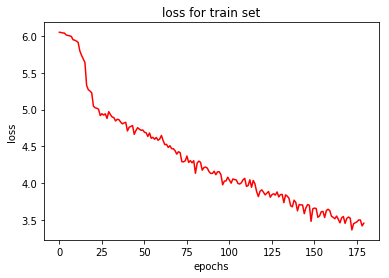

	 time elasped for epoch: 1.9334170818328857
ep=45 step=2 loss=3.498754858970642
ep=45 step=4 loss=3.457845985889435
ep=45 step=6 loss=3.443282882372538
ep=45 step=8 loss=3.4231103360652924


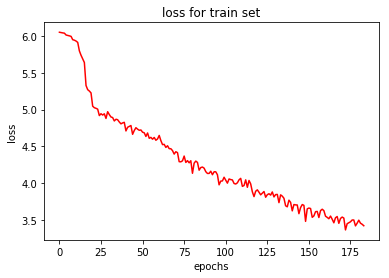

	 time elasped for epoch: 1.8654606342315674
ep=46 step=2 loss=3.359931468963623
ep=46 step=4 loss=3.4330063462257385
ep=46 step=6 loss=3.4075400829315186
ep=46 step=8 loss=3.3897332847118378


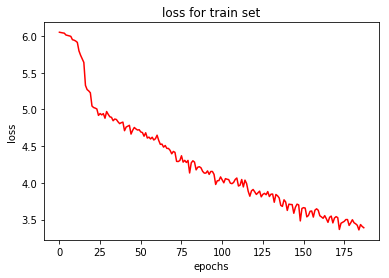

	 time elasped for epoch: 2.266310691833496
ep=47 step=2 loss=3.2628161907196045
ep=47 step=4 loss=3.3240668177604675
ep=47 step=6 loss=3.3531739314397178
ep=47 step=8 loss=3.35589736700058


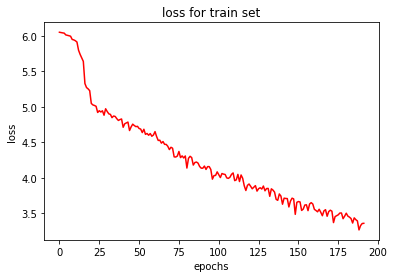

	 time elasped for epoch: 2.0204105377197266
ep=48 step=2 loss=3.2424681186676025
ep=48 step=4 loss=3.2648743391036987
ep=48 step=6 loss=3.3383870919545493
ep=48 step=8 loss=3.344172328710556


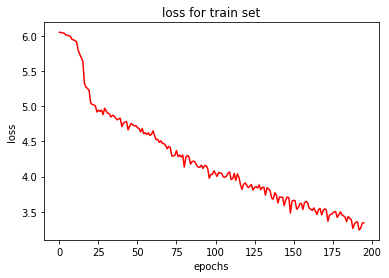

	 time elasped for epoch: 1.897594690322876
ep=49 step=2 loss=3.2421140670776367
ep=49 step=4 loss=3.2946211099624634
ep=49 step=6 loss=3.316848397254944
ep=49 step=8 loss=3.3064936697483063


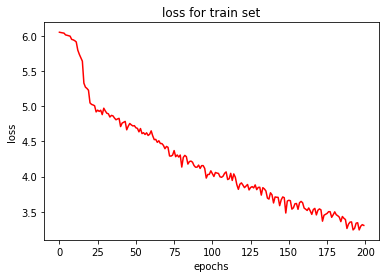

	 time elasped for epoch: 2.0787713527679443
ep=50 step=2 loss=3.340480327606201
ep=50 step=4 loss=3.2981712222099304
ep=50 step=6 loss=3.269111394882202
ep=50 step=8 loss=3.279373437166214


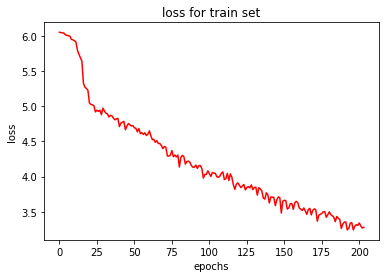

	 time elasped for epoch: 2.241412878036499
ep=51 step=2 loss=3.1883503198623657
ep=51 step=4 loss=3.2486472129821777
ep=51 step=6 loss=3.290583292643229
ep=51 step=8 loss=3.2680969834327698


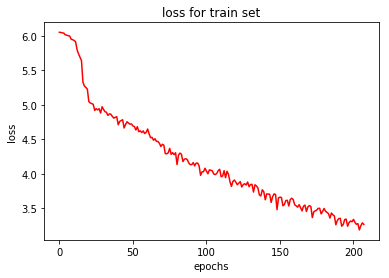

	 time elasped for epoch: 1.927408218383789
ep=52 step=2 loss=3.097731590270996
ep=52 step=4 loss=3.152261734008789
ep=52 step=6 loss=3.237660010655721
ep=52 step=8 loss=3.2274027168750763


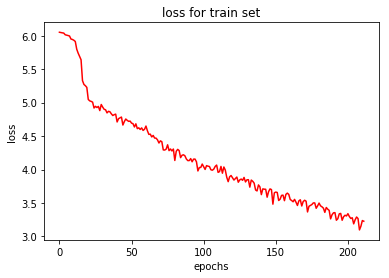

	 time elasped for epoch: 2.403780698776245
ep=53 step=2 loss=3.3144590854644775
ep=53 step=4 loss=3.2144850492477417
ep=53 step=6 loss=3.237904707590739
ep=53 step=8 loss=3.2043810188770294


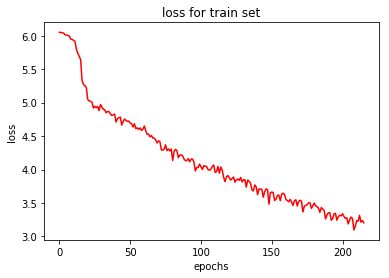

	 time elasped for epoch: 2.020724058151245
ep=54 step=2 loss=3.2519980669021606
ep=54 step=4 loss=3.1994161009788513
ep=54 step=6 loss=3.1859308878580728
ep=54 step=8 loss=3.176260143518448


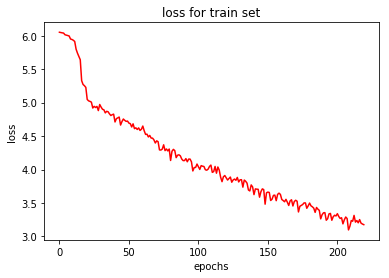

	 time elasped for epoch: 2.0402939319610596
ep=55 step=2 loss=3.2158596515655518
ep=55 step=4 loss=3.152137279510498
ep=55 step=6 loss=3.149120251337687
ep=55 step=8 loss=3.1540059745311737


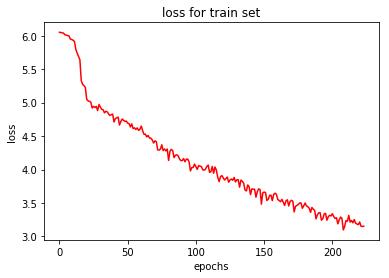

	 time elasped for epoch: 1.9780642986297607
ep=56 step=2 loss=3.1257234811782837
ep=56 step=4 loss=3.1412203907966614
ep=56 step=6 loss=3.1629345814387
ep=56 step=8 loss=3.1571449637413025


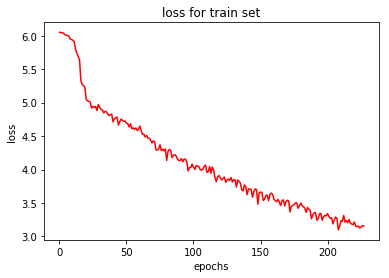

	 time elasped for epoch: 2.1739957332611084
ep=57 step=2 loss=3.2371556758880615
ep=57 step=4 loss=3.0998764038085938
ep=57 step=6 loss=3.1198335886001587
ep=57 step=8 loss=3.1154530942440033


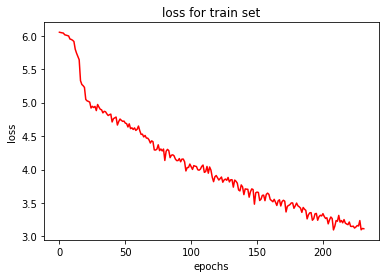

	 time elasped for epoch: 1.958202600479126
ep=58 step=2 loss=3.013351559638977
ep=58 step=4 loss=3.08466774225235
ep=58 step=6 loss=3.133368452390035
ep=58 step=8 loss=3.089913159608841


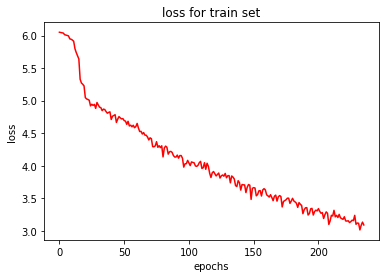

	 time elasped for epoch: 1.9041931629180908
ep=59 step=2 loss=3.1196810007095337
ep=59 step=4 loss=3.1106098890304565
ep=59 step=6 loss=3.130624214808146
ep=59 step=8 loss=3.07486891746521


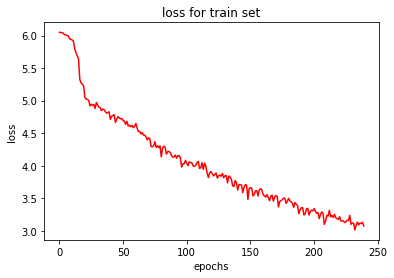

	 time elasped for epoch: 1.875257968902588
ep=60 step=2 loss=2.9335392713546753
ep=60 step=4 loss=3.0187423825263977
ep=60 step=6 loss=3.027512232462565
ep=60 step=8 loss=3.034182131290436


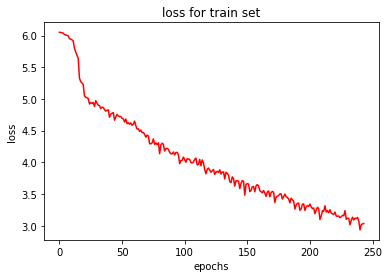

	 time elasped for epoch: 1.9993534088134766
ep=61 step=2 loss=3.043195366859436
ep=61 step=4 loss=3.0032776594161987
ep=61 step=6 loss=3.0010687112808228
ep=61 step=8 loss=3.0236413180828094


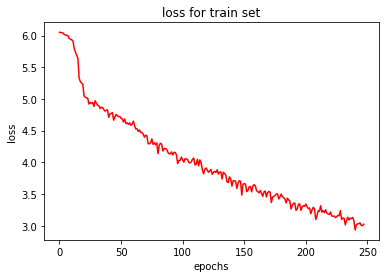

	 time elasped for epoch: 1.9494526386260986
ep=62 step=2 loss=3.0305079221725464
ep=62 step=4 loss=2.9852914810180664
ep=62 step=6 loss=2.9419884284337363
ep=62 step=8 loss=2.990513265132904


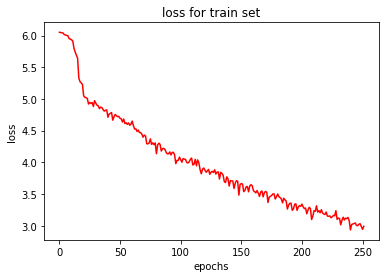

	 time elasped for epoch: 1.8923373222351074
ep=63 step=2 loss=2.968617558479309
ep=63 step=4 loss=2.9646384716033936
ep=63 step=6 loss=2.941992918650309
ep=63 step=8 loss=2.967776209115982


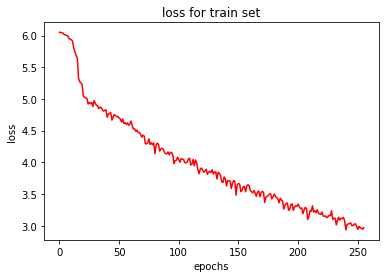

	 time elasped for epoch: 1.9441678524017334
ep=64 step=2 loss=2.806514620780945
ep=64 step=4 loss=2.9073882699012756
ep=64 step=6 loss=2.9110772212346396
ep=64 step=8 loss=2.9488067030906677


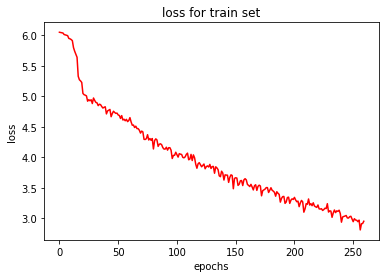

	 time elasped for epoch: 1.8860130310058594
ep=65 step=2 loss=2.826546549797058
ep=65 step=4 loss=2.892078399658203
ep=65 step=6 loss=2.929987152417501
ep=65 step=8 loss=2.9184881448745728


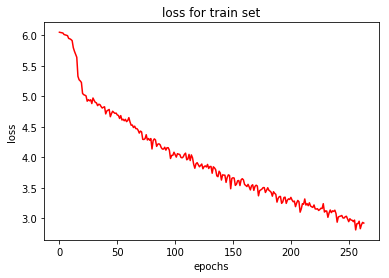

	 time elasped for epoch: 2.4163501262664795
ep=66 step=2 loss=2.9774844646453857
ep=66 step=4 loss=2.9391509294509888
ep=66 step=6 loss=2.947195887565613
ep=66 step=8 loss=2.908628523349762


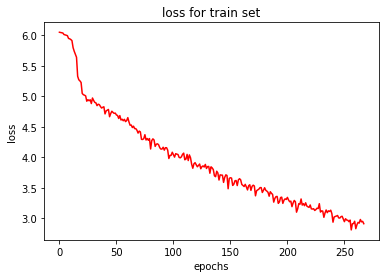

	 time elasped for epoch: 1.98553466796875
ep=67 step=2 loss=2.8478786945343018
ep=67 step=4 loss=2.810402274131775
ep=67 step=6 loss=2.8700102170308432
ep=67 step=8 loss=2.885288953781128


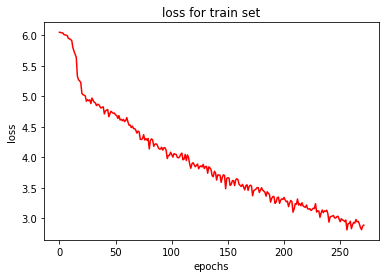

	 time elasped for epoch: 2.122645854949951
ep=68 step=2 loss=2.8408002853393555
ep=68 step=4 loss=2.8367515802383423
ep=68 step=6 loss=2.848150372505188
ep=68 step=8 loss=2.8390786349773407


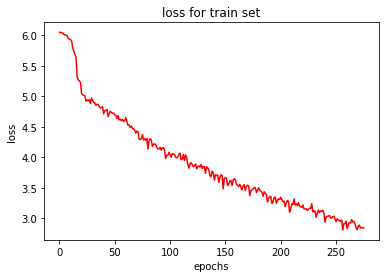

	 time elasped for epoch: 2.031294822692871
ep=69 step=2 loss=2.7978110313415527
ep=69 step=4 loss=2.8314931392669678
ep=69 step=6 loss=2.8367909590403237
ep=69 step=8 loss=2.8401617109775543


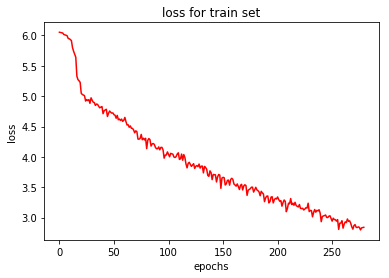

	 time elasped for epoch: 1.9363462924957275
ep=70 step=2 loss=2.712776303291321
ep=70 step=4 loss=2.717088520526886
ep=70 step=6 loss=2.7859479188919067
ep=70 step=8 loss=2.8052211105823517


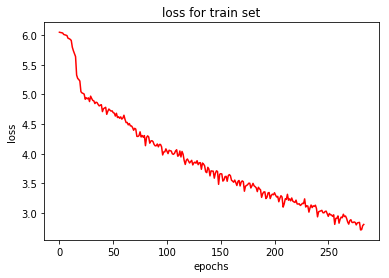

	 time elasped for epoch: 1.8614141941070557
ep=71 step=2 loss=2.8671350479125977
ep=71 step=4 loss=2.8151738047599792
ep=71 step=6 loss=2.7661380767822266
ep=71 step=8 loss=2.771508753299713


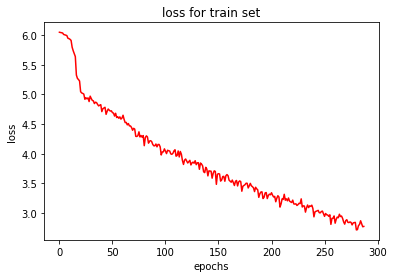

	 time elasped for epoch: 1.829361915588379
ep=72 step=2 loss=2.782118797302246
ep=72 step=4 loss=2.72845196723938
ep=72 step=6 loss=2.7650105953216553
ep=72 step=8 loss=2.753668338060379


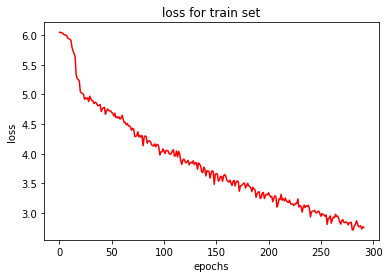

	 time elasped for epoch: 2.057239532470703
ep=73 step=2 loss=2.8134305477142334
ep=73 step=4 loss=2.7398712038993835
ep=73 step=6 loss=2.700651168823242
ep=73 step=8 loss=2.73721706867218


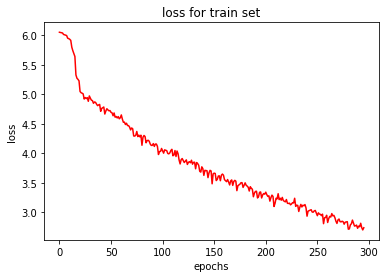

	 time elasped for epoch: 1.881760597229004
ep=74 step=2 loss=2.8114198446273804
ep=74 step=4 loss=2.7533374428749084
ep=74 step=6 loss=2.7394269704818726
ep=74 step=8 loss=2.718998044729233


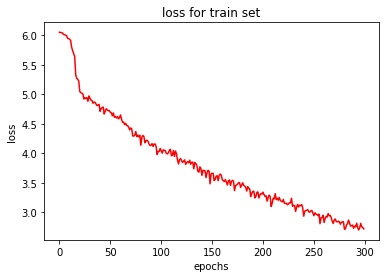

	 time elasped for epoch: 1.8353240489959717
ep=75 step=2 loss=2.659182906150818
ep=75 step=4 loss=2.6628682613372803
ep=75 step=6 loss=2.6682312885920205
ep=75 step=8 loss=2.699151635169983


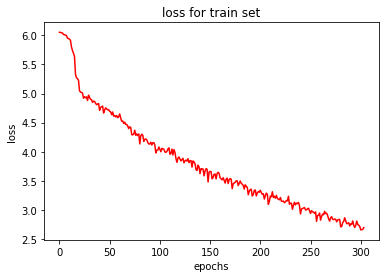

	 time elasped for epoch: 1.9894676208496094
ep=76 step=2 loss=2.5972352027893066
ep=76 step=4 loss=2.635391592979431
ep=76 step=6 loss=2.6346779266993203
ep=76 step=8 loss=2.686225861310959


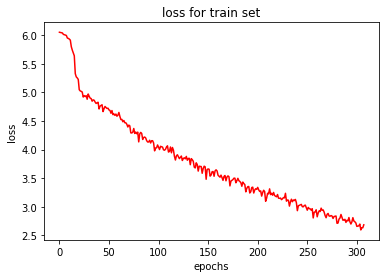

	 time elasped for epoch: 2.1095988750457764
ep=77 step=2 loss=2.709676146507263
ep=77 step=4 loss=2.703448712825775
ep=77 step=6 loss=2.636658946673075
ep=77 step=8 loss=2.6616554856300354


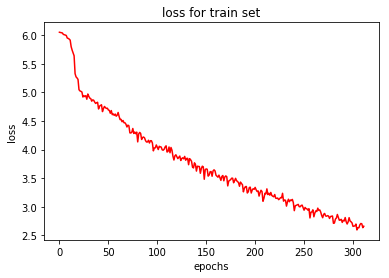

	 time elasped for epoch: 1.9625663757324219
ep=78 step=2 loss=2.6838889122009277
ep=78 step=4 loss=2.608887732028961
ep=78 step=6 loss=2.6648440758387246
ep=78 step=8 loss=2.652872145175934


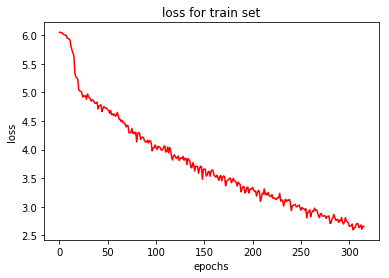

	 time elasped for epoch: 1.9107022285461426
ep=79 step=2 loss=2.7079654932022095
ep=79 step=4 loss=2.706307590007782
ep=79 step=6 loss=2.6301042636235556
ep=79 step=8 loss=2.626162886619568


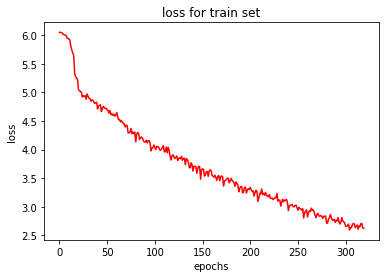

	 time elasped for epoch: 1.9092648029327393
ep=80 step=2 loss=2.6087573766708374
ep=80 step=4 loss=2.565288245677948
ep=80 step=6 loss=2.566546320915222
ep=80 step=8 loss=2.586466908454895


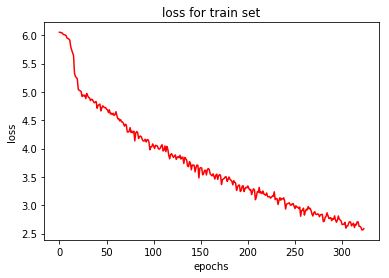

	 time elasped for epoch: 2.6253535747528076
ep=81 step=2 loss=2.561395287513733
ep=81 step=4 loss=2.5827873945236206
ep=81 step=6 loss=2.587593992551168
ep=81 step=8 loss=2.566716343164444


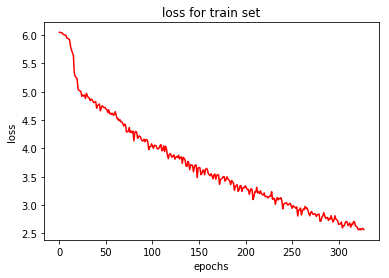

	 time elasped for epoch: 1.9405500888824463
ep=82 step=2 loss=2.6726908683776855
ep=82 step=4 loss=2.574643850326538
ep=82 step=6 loss=2.5828811724980674
ep=82 step=8 loss=2.5740888118743896


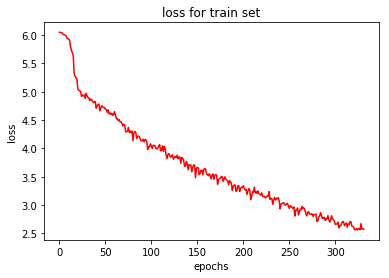

	 time elasped for epoch: 2.006612539291382
ep=83 step=2 loss=2.673485040664673
ep=83 step=4 loss=2.5611221194267273
ep=83 step=6 loss=2.5193055868148804
ep=83 step=8 loss=2.5289172530174255


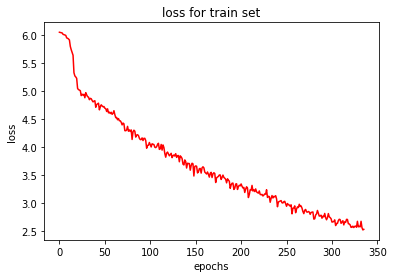

	 time elasped for epoch: 2.190462589263916
ep=84 step=2 loss=2.399910807609558
ep=84 step=4 loss=2.443873941898346
ep=84 step=6 loss=2.491547187169393
ep=84 step=8 loss=2.4923947155475616


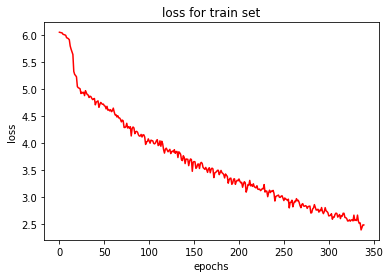

	 time elasped for epoch: 1.8602612018585205
ep=85 step=2 loss=2.6413151025772095
ep=85 step=4 loss=2.531945824623108
ep=85 step=6 loss=2.50434672832489
ep=85 step=8 loss=2.476431518793106


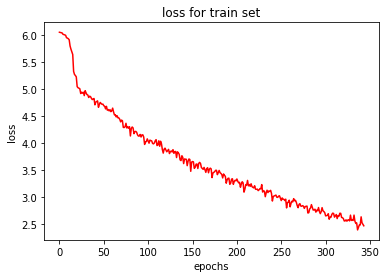

	 time elasped for epoch: 1.9655799865722656
ep=86 step=2 loss=2.4809281826019287
ep=86 step=4 loss=2.4124624133110046
ep=86 step=6 loss=2.4266251722971597
ep=86 step=8 loss=2.439836084842682


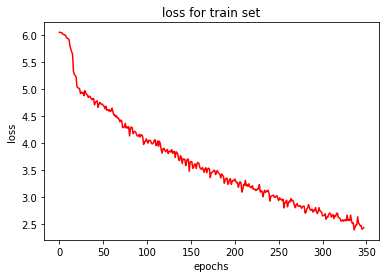

	 time elasped for epoch: 2.0228793621063232
ep=87 step=2 loss=2.5222973823547363
ep=87 step=4 loss=2.4893906116485596
ep=87 step=6 loss=2.4691697359085083
ep=87 step=8 loss=2.453542470932007


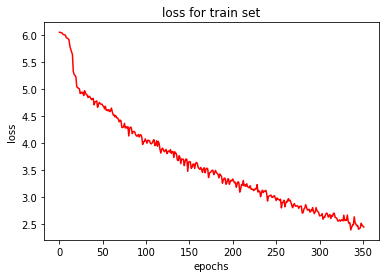

	 time elasped for epoch: 2.0402002334594727
ep=88 step=2 loss=2.4513670206069946
ep=88 step=4 loss=2.3803333044052124
ep=88 step=6 loss=2.4266913334528604
ep=88 step=8 loss=2.4119168519973755


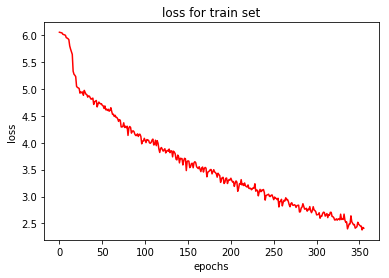

	 time elasped for epoch: 1.9506239891052246
ep=89 step=2 loss=2.313256621360779
ep=89 step=4 loss=2.3669472336769104
ep=89 step=6 loss=2.369875907897949
ep=89 step=8 loss=2.386680632829666


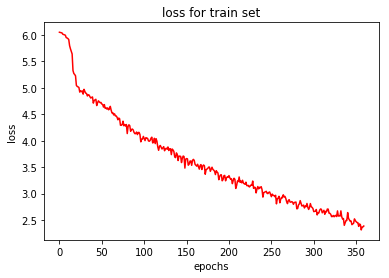

	 time elasped for epoch: 1.951779842376709
ep=90 step=2 loss=2.3437706232070923
ep=90 step=4 loss=2.3296552896499634
ep=90 step=6 loss=2.3551595211029053
ep=90 step=8 loss=2.370294511318207


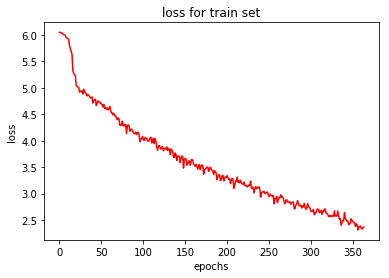

	 time elasped for epoch: 1.8852124214172363
ep=91 step=2 loss=2.2424060106277466
ep=91 step=4 loss=2.3122317790985107
ep=91 step=6 loss=2.318321386973063
ep=91 step=8 loss=2.338462471961975


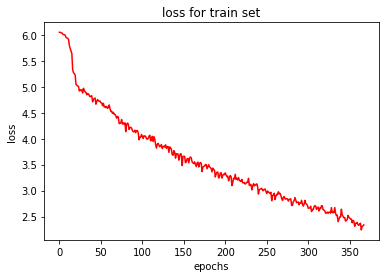

	 time elasped for epoch: 2.094982862472534
ep=92 step=2 loss=2.313659191131592
ep=92 step=4 loss=2.298937439918518
ep=92 step=6 loss=2.3325764338175454
ep=92 step=8 loss=2.329221487045288


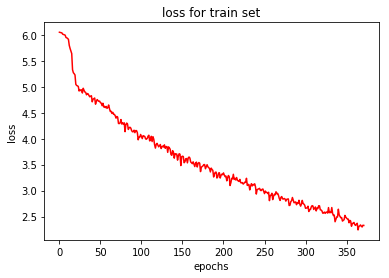

	 time elasped for epoch: 1.965970516204834
ep=93 step=2 loss=2.332032084465027
ep=93 step=4 loss=2.275831460952759
ep=93 step=6 loss=2.2869013945261636
ep=93 step=8 loss=2.2998695969581604


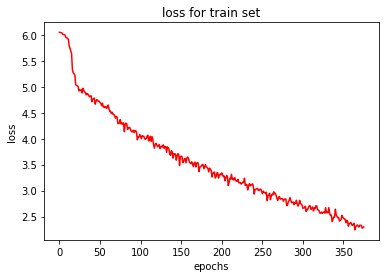

	 time elasped for epoch: 2.135152816772461
ep=94 step=2 loss=2.311028003692627
ep=94 step=4 loss=2.2896026372909546
ep=94 step=6 loss=2.2765387694040933
ep=94 step=8 loss=2.284533351659775


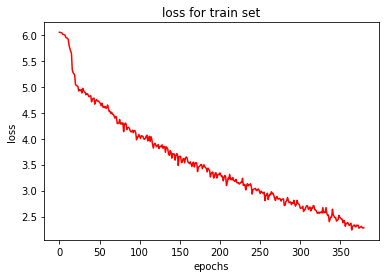

	 time elasped for epoch: 2.70646333694458
ep=95 step=2 loss=2.3485273122787476
ep=95 step=4 loss=2.31363844871521
ep=95 step=6 loss=2.2694751818974814
ep=95 step=8 loss=2.2554003298282623


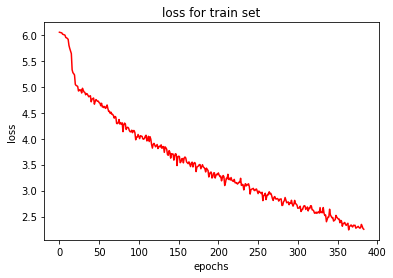

	 time elasped for epoch: 1.9545726776123047
ep=96 step=2 loss=2.194507598876953
ep=96 step=4 loss=2.252274990081787
ep=96 step=6 loss=2.2654669284820557
ep=96 step=8 loss=2.242950290441513


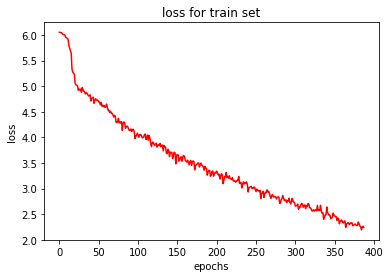

	 time elasped for epoch: 2.102375030517578
ep=97 step=2 loss=2.22831130027771
ep=97 step=4 loss=2.269649624824524
ep=97 step=6 loss=2.2559123436609902
ep=97 step=8 loss=2.2185165882110596


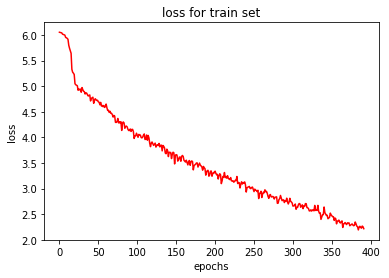

	 time elasped for epoch: 2.1257240772247314
ep=98 step=2 loss=2.2084639072418213
ep=98 step=4 loss=2.1654547452926636
ep=98 step=6 loss=2.1838892698287964
ep=98 step=8 loss=2.1957081258296967


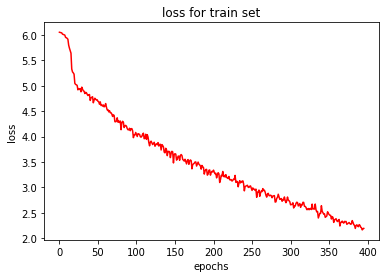

	 time elasped for epoch: 2.024906873703003
ep=99 step=2 loss=2.2319167852401733
ep=99 step=4 loss=2.1992114782333374
ep=99 step=6 loss=2.2172537644704184
ep=99 step=8 loss=2.202902674674988


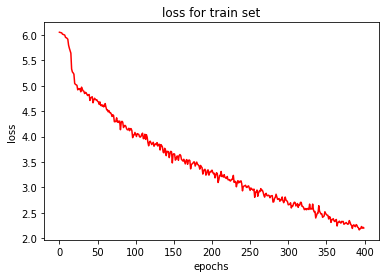

	 time elasped for epoch: 1.8640470504760742


In [5]:
from src.image_processor import train_transform, default_image_transform
from src.base_experiment import plot_eval, run_model
import time 

num_epochs = 100

train_loader = manager.build_dataloader('train', 
                                        batch_size=10, 
                                        shuffle=True, 
#                                         image_transform=train_transform)
                                        image_transform=default_image_transform)
# val_loader   = manager.build_dataloader('val', 
#                                         batch_size=5)
# test_loader  = manager.build_dataloader('test', 
#                                         batch_size=5)

all_losses = []
plot_loss_map = {
    'loss': {'train': all_losses}
}

for epoch in range(num_epochs):
    t0 = time.time()
    losses, logged_losses = run_model(net, 
                          train_loader, 
                          criterion, 
                          optimizer,
                          train=True,
                          epoch=epoch)

    all_losses += logged_losses
    plot_eval(plot_loss_map, "train", name='loss')
    print("\t time elasped for epoch: {}".format(time.time()-t0))
    


## Perplexity Testing

In [13]:
from src.base_experiment import compute_perplexity
val_loader = manager.build_dataloader('val', batch_size=5)

train_perplexity = compute_perplexity(net, train_loader, criterion, manager)
val_perplexity   = compute_perplexity(net, val_loader, criterion, manager)

print("train perplexity: {}".format(train_perplexity))
print("train perplexity: {}".format(val_perplexity))

total_ce_loss 17.191351413726807
token_counts 1046
sentence_count 80
total_ce_loss 12.174712657928467
token_counts 143
sentence_count 10
train perplexity: 1.2397278660537698
train perplexity: 3.378633256690959


## Model Evaluation

In [7]:
# from src.base_experiment import evaluate_model
# val_loader   = manager.build_dataloader('val', batch_size=5)
# evaluate_model(net, train_loader, criterion, manager)
# evaluate_model(net, val_loader, criterion, manager)

In [ ]:
losses, _ = run_model(net, 
                      train_loader, 
                      criterion, 
                      optimizer,
                      train=True,
                      epoch=epoch)

In [ ]:
torch.device('cuda') == device

# from collections import defaultdict
# data = defaultdict(dict)

# Y_test = [x**2 for x in range(20)]
# Y_train = [math.sqrt(x) for x in range(20)]
# Y_val = [x for x in range(20)]

# data['loss']['train'] = Y_train
# data['loss']['test'] = Y_test
# data['loss']['val'] = Y_val

# plot_eval(data, 'train', name='loss')
# plot_eval(data, 'test', name='loss')
# plot_eval(data, 'val', name='loss')